In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("dark")
#from decimal import Decimal
import matplotlib.pyplot as plt
#from bs4 import BeautifulSoup
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import LogisticRegression
#import sklearn.metrics as metrics
#from sklearn.ensemble import RandomForestRegressor

In [2]:
movies_df = pd.read_csv('../../dataset/MovieLens_files/movies.csv')

In [3]:
movies_df.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [4]:
ratings_df = pd.read_csv('../../dataset/MovieLens_files/ratings.csv')

In [5]:
ratings_df.head()

userId  movieId  rating   timestamp
0       1        2     3.5  1112486027
1       1       29     3.5  1112484676
2       1       32     3.5  1112484819
3       1       47     3.5  1112484727
4       1       50     3.5  1112484580

# Mainly 2 dataframes were used for this simple solution without any model.

- One dataframe with each user ratings for a certain film (ratings_df) and another dataframe with the title and genre of the movie (movies_df). Time to merge them together through the column movieId

In [6]:
new_movies_df = pd.merge(ratings_df,movies_df[['movieId', 'title']],on="movieId")
new_movies_df.head()

userId  movieId  rating   timestamp           title
0       1        2     3.5  1112486027  Jumanji (1995)
1       5        2     3.0   851527569  Jumanji (1995)
2      13        2     3.0   849082742  Jumanji (1995)
3      29        2     3.0   835562174  Jumanji (1995)
4      34        2     3.0   846509384  Jumanji (1995)

In [7]:
new_movies_df.groupby("title").mean()['rating'].sort_values(ascending=False).head(10)

title
Prom Queen: The Marc Hall Story (2004)                        5.0
The Garden of Sinners - Chapter 5: Paradox Paradigm (2008)    5.0
Death of a Nation - The Timor Conspiracy (1994)               5.0
Poison (1951)                                                 5.0
Sun Kissed (2012)                                             5.0
Giorgino (1994)                                               5.0
Schmatta: Rags to Riches to Rags (2009)                       5.0
De la servitude moderne (2009)                                5.0
The Encounter (2010)                                          5.0
Best of Ernie and Bert, The (1988)                            5.0
Name: rating, dtype: float64

### Seeing the best rated movies in the dataset, most of them are movies that are not known and have been rated only one time.

In [8]:

# Creating a new dataframe with the movie title, avg_rating and the number of times the movie was rated.
new_ratings_df1 = new_movies_df.groupby(new_movies_df['title']).mean().reset_index()[['title', 'rating']]
new_ratings_df2 = new_movies_df.groupby(new_movies_df['title']).count().reset_index()[['title', 'rating']]

new_ratings_df = new_ratings_df1.merge(new_ratings_df2, on="title")
new_ratings_df.columns = ['title', 'avg_rating', 'count_rating']
new_ratings_df.head()

title  avg_rating  count_rating
0                   "Great Performances" Cats (1998)    2.748387           155
1  #chicagoGirl: The Social Network Takes on a Di...    3.666667             3
2                                 $ (Dollars) (1971)    2.833333            24
3                                    $5 a Day (2008)    2.871795            39
4                                       $9.99 (2008)    3.009091            55

In [9]:

# As we can see, all the films that are best rated in the dataset are only rated one time.
new_ratings_df.sort_values(by='avg_rating', ascending=False)

title  avg_rating  \
18750             Prom Queen: The Marc Hall Story (2004)         5.0   
23270  The Garden of Sinners - Chapter 5: Paradox Par...         5.0   
6223     Death of a Nation - The Timor Conspiracy (1994)         5.0   
18369                                      Poison (1951)         5.0   
22392                                  Sun Kissed (2012)         5.0   
...                                                  ...         ...   
23520               The Robot vs. the Aztec Mummy (1958)         0.5   
15295                                Mega Piranha (2010)         0.5   
23504                           The Radio Pirates (2007)         0.5   
8400                             First Texan, The (1956)         0.5   
996     Allan Quatermain and the Temple of Skulls (2008)         0.5   

       count_rating  
18750             1  
23270             1  
6223              1  
18369             1  
22392             1  
...             ...  
23520             1  
15295             1  
23504             1  
8400              1  
996               1  

[26729 rows x 3 columns]

<function matplotlib.pyplot.show(*args, **kw)>

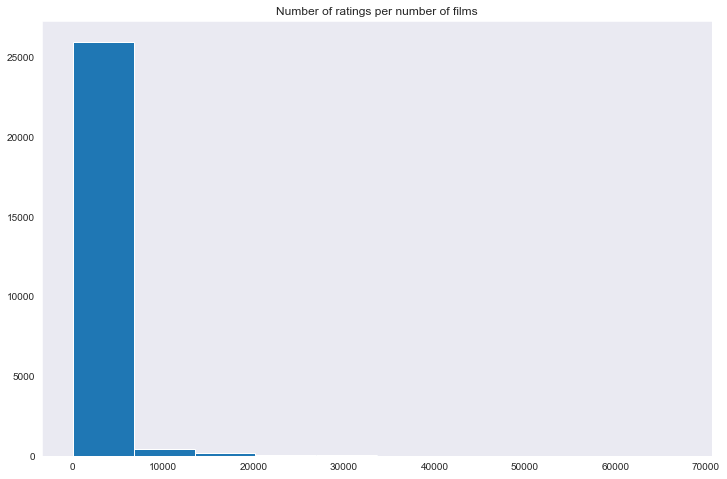

In [10]:
plt.figure(figsize=(12,8))
plt.hist(new_ratings_df['count_rating'])
plt.title("Number of ratings per number of films")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

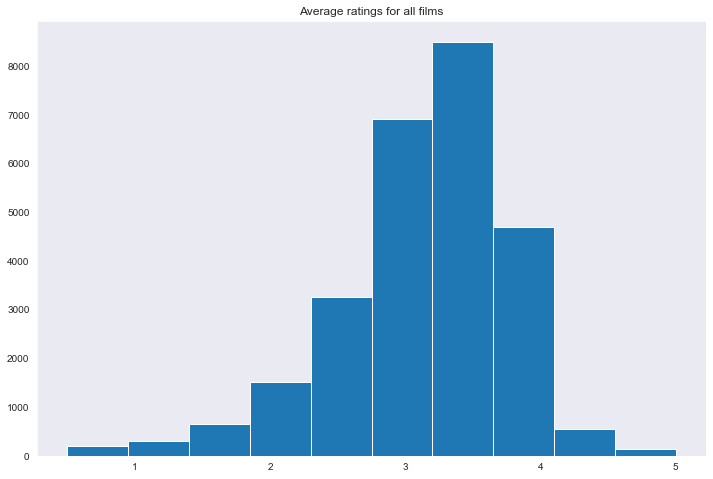

In [11]:
plt.figure(figsize=(12,8))
plt.hist(new_ratings_df['avg_rating'])
plt.title("Average ratings for all films")
plt.show

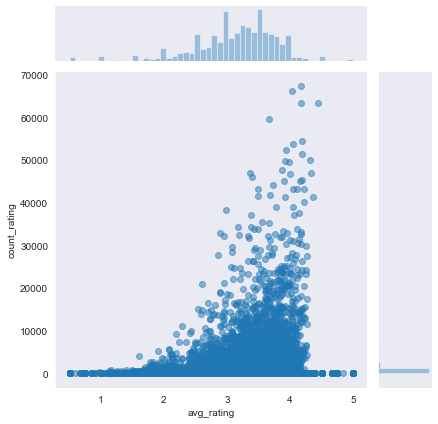

In [12]:
# Seeing the relationship between average rating and the number of times the film is rated.
sns.jointplot(x='avg_rating',y='count_rating',data=new_ratings_df,alpha=0.5)

# Insights from plot

- We can see in the plot that most films have less than 10000 ratings and there are a very small number of films that are highly popular (rated a lot of times) and highly rated (more than 3.5 stars).

We have to arrange a way to take out the movies that are seen only a few number of times for the model to work.

In [13]:
new_ratings_df['count_rating'].describe()

count    26729.000000
mean       748.260803
std       3086.673456
min          1.000000
25%          3.000000
50%         18.000000
75%        205.000000
max      67310.000000
Name: count_rating, dtype: float64

#### The group assumed 800 was a reasonable number of reviews for a film to be accepted in our recommendation system. This was a crucial step because it was important for our recommendation system to be unbiased.

In [14]:
new_ratings_df = new_ratings_df[new_ratings_df['count_rating']>800]

In [15]:
new_ratings_df.sort_values(by='avg_rating', ascending=False)

title  avg_rating  count_rating
20780          Shawshank Redemption, The (1994)    4.446990         63366
9587                      Godfather, The (1972)    4.364732         41355
24968                Usual Suspects, The (1995)    4.334372         47006
20318                   Schindler's List (1993)    4.310175         50054
9588             Godfather: Part II, The (1974)    4.275641         27398
...                                         ...         ...           ...
18399  Police Academy: Mission to Moscow (1994)    1.748112           927
8850            Free Willy 3: The Rescue (1997)    1.706164           941
1879                       Baby Geniuses (1999)    1.703002          1399
2238                   Battlefield Earth (2000)    1.600554          3973
7589                          Epic Movie (2007)    1.488877           899

[3555 rows x 3 columns]

#### We still have 3555 movies in our dataset (18% of the original dataset), which is still more than enough in a recommendation system for a casual moviegoer.

In [16]:
# Filtering in our original dataset by the films that have more than 800 ratings
new_movies_df = new_movies_df.groupby("title").filter(lambda x: len(x) >= 800)

In [17]:
new_movies_df.head()

userId  movieId  rating   timestamp           title
0       1        2     3.5  1112486027  Jumanji (1995)
1       5        2     3.0   851527569  Jumanji (1995)
2      13        2     3.0   849082742  Jumanji (1995)
3      29        2     3.0   835562174  Jumanji (1995)
4      34        2     3.0   846509384  Jumanji (1995)

In [18]:
moviematrix = new_movies_df.pivot_table(index="userId",columns="title",values='rating')
moviematrix.tail()

title   'burbs, The (1989)  (500) Days of Summer (2009)  \
userId                                                    
138489                 NaN                          NaN   
138490                 NaN                          NaN   
138491                 NaN                          NaN   
138492                 NaN                          NaN   
138493                 NaN                          NaN   

title   *batteries not included (1987)  ...And Justice for All (1979)  \
userId                                                                  
138489                             NaN                            NaN   
138490                             NaN                            NaN   
138491                             NaN                            NaN   
138492                             NaN                            NaN   
138493                             NaN                            NaN   

title   10 Things I Hate About You (1999)  10,000 BC (2008)  \
userId                                                        
138489                                NaN               NaN   
138490                                NaN               NaN   
138491                                NaN               NaN   
138492                                NaN               NaN   
138493                                NaN               NaN   

title   101 Dalmatians (1996)  \
userId                          
138489                    NaN   
138490                    NaN   
138491                    NaN   
138492                    NaN   
138493                    3.0   

title   101 Dalmatians (One Hundred and One Dalmatians) (1961)  \
userId                                                           
138489                                                NaN        
138490                                                NaN        
138491                                                2.5        
138492                                                NaN        
138493                                                3.5        

title   102 Dalmatians (2000)  12 Angry Men (1957)  ...  \
userId                                              ...   
138489                    NaN                  4.5  ...   
138490                    NaN                  NaN  ...   
138491                    NaN                  NaN  ...   
138492                    NaN                  NaN  ...   
138493                    NaN                  4.0  ...   

title   Zero Dark Thirty (2012)  Zero Effect (1998)  Zodiac (2007)  \
userId                                                               
138489                      NaN                 NaN            NaN   
138490                      NaN                 NaN            NaN   
138491                      NaN                 NaN            NaN   
138492                      NaN                 NaN            NaN   
138493                      NaN                 NaN            NaN   

title   Zombieland (2009)  Zoolander (2001)  Zulu (1964)  [REC] (2007)  \
userId                                                                   
138489                NaN               NaN          NaN           NaN   
138490                NaN               NaN          NaN           NaN   
138491                NaN               NaN          NaN           NaN   
138492                NaN               NaN          NaN           NaN   
138493                NaN               NaN          NaN           NaN   

title   eXistenZ (1999)  xXx (2002)  ¡Three Amigos! (1986)  
userId                                                      
138489              NaN         NaN                    NaN  
138490              NaN         NaN                    NaN  
138491              NaN         NaN                    NaN  
138492              NaN         NaN                    NaN  
138493              NaN         NaN                    NaN  

[5 rows x 3556 columns]

In [19]:
matrix_user_ratings = moviematrix['Matrix, The (1999)']
matrix_user_ratings.head()

userId
1    NaN
2    NaN
3    5.0
4    NaN
5    NaN
Name: Matrix, The (1999), dtype: float64

In [20]:
similar_to_matrix=moviematrix.corrwith(matrix_user_ratings)    

In [21]:
similar_to_matrix

title
'burbs, The (1989)                   0.074737
(500) Days of Summer (2009)          0.092075
*batteries not included (1987)       0.143223
...And Justice for All (1979)        0.129631
10 Things I Hate About You (1999)    0.119242
                                       ...   
Zulu (1964)                          0.150316
[REC] (2007)                         0.109566
eXistenZ (1999)                      0.129947
xXx (2002)                           0.226996
¡Three Amigos! (1986)                0.153285
Length: 3556, dtype: float64

In [22]:
corr_matrix=pd.DataFrame(similar_to_matrix,columns=['correlation'])
corr_matrix.head()

correlation
title                                         
'burbs, The (1989)                    0.074737
(500) Days of Summer (2009)           0.092075
*batteries not included (1987)        0.143223
...And Justice for All (1979)         0.129631
10 Things I Hate About You (1999)     0.119242

In [23]:
corr_matrix.dropna(inplace=True)

In [24]:
corr_matrix.sort_values('correlation',ascending=False).head(10)

correlation
title                                                          
Matrix, The (1999)                                     1.000000
Matrix Reloaded, The (2003)                            0.516906
Matrix Revolutions, The (2003)                         0.449588
Animatrix, The (2003)                                  0.367151
Blade (1998)                                           0.334493
Terminator 2: Judgment Day (1991)                      0.333882
Minority Report (2002)                                 0.332434
Edge of Tomorrow (2014)                                0.326762
Mission: Impossible (1996)                             0.320815
Lord of the Rings: The Fellowship of the Ring, ...     0.318726

In [25]:
new_df = pd.DataFrame({
    'title': corr_matrix.index,
    'correlation': corr_matrix.correlation
})
del new_df['title']

In [26]:
new_df = new_df.reset_index()

In [27]:
corr_starwars=new_df.merge(new_ratings_df[['count_rating', 'title']], on="title")

In [28]:
corr_starwars

title  correlation  count_rating
0                    'burbs, The (1989)     0.074737          3220
1           (500) Days of Summer (2009)     0.092075          5767
2        *batteries not included (1987)     0.143223          1730
3         ...And Justice for All (1979)     0.129631          1136
4     10 Things I Hate About You (1999)     0.119242         11613
...                                 ...          ...           ...
3550                        Zulu (1964)     0.150316          1004
3551                       [REC] (2007)     0.109566          1051
3552                    eXistenZ (1999)     0.129947          5298
3553                         xXx (2002)     0.226996          4542
3554              ¡Three Amigos! (1986)     0.153285          6485

[3555 rows x 3 columns]

In [29]:
corr_starwars[corr_starwars['count_rating']>100].sort_values('correlation',ascending=False)[1:]

title  correlation  \
2054                      Matrix Reloaded, The (2003)     0.516906   
2055                   Matrix Revolutions, The (2003)     0.449588   
194                             Animatrix, The (2003)     0.367151   
413                                      Blade (1998)     0.334493   
3172                Terminator 2: Judgment Day (1991)     0.333882   
...                                               ...          ...   
3272                        Toxic Avenger, The (1985)    -0.059295   
2302  Nights of Cabiria (Notti di Cabiria, Le) (1957)    -0.061010   
2846                          Sex and the City (2008)    -0.067293   
377                             Big Green, The (1995)    -0.072558   
1595                   Idiots, The (Idioterne) (1998)    -0.079884   

      count_rating  
2054         17003  
2055         12282  
194           2812  
413          11401  
3172         52244  
...            ...  
3272          1136  
2302          1152  
2846          1152  
377            956  
1595           821  

[3554 rows x 3 columns]

In [30]:
def predict_movies(movie_name):
    
    # Get ratings of movie title
    movie_user_ratings=moviematrix[movie_name]
    
    # Creating column which shows the correlation of the ratings between the movie chosen and all other movies that other users have also watched.
    similar_to_matrix=moviematrix.corrwith(movie_user_ratings)
    
    # Creating a dataframe for better visualization.
    corr_matrix=pd.DataFrame(similar_to_matrix,columns=['correlation'])
    
    # Dropping the movies that have not been watched by the people that have watched the movie
    corr_matrix.dropna(inplace=True)
    
    # Creating a new dataframe because our previous one was a groupby and it's impossible to perform the next transformations. 
    new_df = pd.DataFrame({
    'title': corr_matrix.index,
    'correlation': corr_matrix.correlation
    })
    del new_df['title']
    new_df = new_df.reset_index()
    corr_starwars=new_df.merge(new_ratings_df[['count_rating', 'title']], on="title")
    
    # Show the 10 films that are recommended if someone wants to watch a similar movie
    predictions = corr_starwars[corr_starwars['count_rating']>100].sort_values('correlation',ascending=False)[1:]
    return predictions.head(10)

In [31]:
predict_movies('Iron Man (2008)')

title  correlation  count_rating
1661                          Iron Man 2 (2010)     0.642771          4192
254                        Avengers, The (2012)     0.563482          4959
1662                          Iron Man 3 (2013)     0.540984          1862
3211                                Thor (2011)     0.528910          2580
573   Captain America: The First Avenger (2011)     0.504828          2313
3256                        Tom and Huck (1995)     0.487208          1415
3212                Thor: The Dark World (2013)     0.474355           886
1623                Incredible Hulk, The (2008)     0.474069          2711
3282                        Transformers (2007)     0.462565          5664
3520                               X-Men (2000)     0.458369         26846

In [32]:
predict_movies('Matrix, The (1999)')

title  correlation  \
2054                        Matrix Reloaded, The (2003)     0.516906   
2055                     Matrix Revolutions, The (2003)     0.449588   
194                               Animatrix, The (2003)     0.367151   
413                                        Blade (1998)     0.334493   
3172                  Terminator 2: Judgment Day (1991)     0.333882   
2123                             Minority Report (2002)     0.332434   
993                             Edge of Tomorrow (2014)     0.326762   
2134                         Mission: Impossible (1996)     0.320815   
1937  Lord of the Rings: The Fellowship of the Ring,...     0.318726   
1939      Lord of the Rings: The Two Towers, The (2002)     0.318086   

      count_rating  
2054         17003  
2055         12282  
194           2812  
413          11401  
3172         52244  
2123         23642  
993           1666  
2134         37127  
1937         37553  
1939         33947

In [33]:
predict_movies('Snatch (2000)')

title  correlation  \
1916        Lock, Stock & Two Smoking Barrels (1998)     0.614012   
2715                               RocknRolla (2008)     0.418747   
3197  Things to Do in Denver When You're Dead (1995)     0.418671   
1005             Elite Squad (Tropa de Elite) (2007)     0.413065   
1853                               Layer Cake (2004)     0.393829   
845                        Death at a Funeral (2007)     0.366050   
1963                      Lucky Number Slevin (2006)     0.363145   
1770                              Killing Zoe (1994)     0.362819   
461                      Boondock Saints, The (2000)     0.362210   
1195                               Four Rooms (1995)     0.353286   

      count_rating  
1916         15325  
2715          1394  
3197          3209  
1005           898  
1853          2883  
845           1300  
1963          5853  
1770          2716  
461           8027  
1195          5203